In [4]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl

In [5]:
r1 = np.zeros(16)
r2 = np.hstack([np.zeros(2), np.ones(12), np.zeros(2)])
r3 = np.insert(np.insert(np.zeros(14), 2, 1), -2, 1)
x = np.vstack([r1, r1, r2, np.tile(r3, (10, 1)), r2, r1, r1])

In [6]:
k1 = np.zeros((2,2))
k1[:,0] = 1; k1[:,1] = -1
k1

array([[ 1., -1.],
       [ 1., -1.]])

In [7]:
k2 = np.zeros((2,2))
k2[0, :] = 1; k2[1, :] = -1
k2

array([[ 1.,  1.],
       [-1., -1.]])

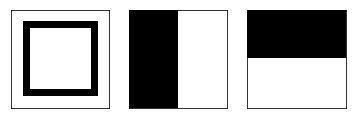

In [8]:
plt.subplot(131)
plt.imshow(x, cmap=mpl.cm.bone_r)
plt.xticks([]); plt.yticks([])
plt.subplot(132)
plt.imshow(k1, cmap=mpl.cm.bone_r)
plt.xticks([]); plt.yticks([])
plt.subplot(133)
plt.imshow(k2, cmap=mpl.cm.bone_r)
plt.xticks([]); plt.yticks([])
plt.show()

In [10]:
from scipy.ndimage.filters import convolve

phi1 = convolve(x, k1)
phi2 = convolve(x, k2)

In [12]:
from skimage.measure import block_reduce

phi1r = block_reduce(phi1, (2,2), np.max)
phi2r = block_reduce(phi2, (2,2), np.max)

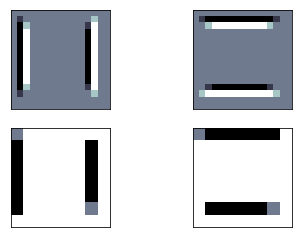

In [13]:
plt.subplot(221)
plt.imshow(phi1, cmap=mpl.cm.bone_r)
plt.grid(False); plt.xticks([]); plt.yticks([])
plt.subplot(222)
plt.imshow(phi2, cmap=mpl.cm.bone_r)
plt.grid(False); plt.xticks([]); plt.yticks([])
plt.subplot(223)
plt.imshow(phi1r, cmap=mpl.cm.bone_r)
plt.grid(False); plt.xticks([]); plt.yticks([])
plt.subplot(224)
plt.imshow(phi2r, cmap=mpl.cm.bone_r)
plt.grid(False); plt.xticks([]); plt.yticks([])
plt.show()

In [22]:
k1 = np.zeros((3,3))
k1[:,0] = 1; k1[:,1] = -1; k1[:,2] = -2
k1

array([[ 1., -1., -2.],
       [ 1., -1., -2.],
       [ 1., -1., -2.]])

In [7]:
k2 = np.zeros((2,2))
k2[0, :] = 1; k2[1, :] = -1
k2

array([[ 1.,  1.],
       [-1., -1.]])

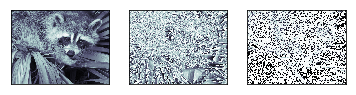

In [23]:
import scipy as sp
x = sp.misc.face(gray=True)
phi1 = convolve(x, k1)
phi2 = convolve(x, k2)
phi1r = block_reduce(phi1, (2,2), np.max)
phi2r = block_reduce(phi2, (2,2), np.max)

plt.subplot(131)
plt.imshow(x, cmap=mpl.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([])
plt.subplot(132)
plt.imshow(phi1r, cmap=mpl.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([])
plt.subplot(133)
plt.imshow(phi2r, cmap=mpl.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([])
plt.show()

# CNN Realization by using Keras

In [26]:
from keras.datasets import mnist
from keras.utils import np_utils

(train_X , train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X[:, :, :, np.newaxis].astype('float32') / 255.0
# put new channel dimension explicitly
test_X = test_X[:, :, :, np.newaxis].astype('float32') / 255.0
# put new channel dimension explicitly
train_y = np_utils.to_categorical(train_y, 10)
# Label Encoding
test_y = np_utils.to_categorical(test_y, 10)
# Label Encoding

In [28]:
train_X.shape , train_y.shape

((60000, 28, 28, 1), (60000, 10))

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2

In [35]:
model1 = Sequential()
model1.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))

np.random.seed(0)
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [36]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5770      
Total params: 5,874
Trainable params: 5,874
Non-trainable params: 0
_________________________________________________________________


In [37]:
%%time
hist1 = model1.fit(train_X, train_y, epochs=10, batch_size=600, validation_data=(test_X, test_y), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.8078 - acc: 0.7645 - val_loss: 0.3615 - val_acc: 0.9006
Epoch 2/10
 - 7s - loss: 0.3260 - acc: 0.9063 - val_loss: 0.2926 - val_acc: 0.9136
Epoch 3/10
 - 7s - loss: 0.2759 - acc: 0.9210 - val_loss: 0.2453 - val_acc: 0.9301
Epoch 4/10
 - 7s - loss: 0.2443 - acc: 0.9305 - val_loss: 0.2148 - val_acc: 0.9378
Epoch 5/10
 - 8s - loss: 0.2196 - acc: 0.9368 - val_loss: 0.1954 - val_acc: 0.9453
Epoch 6/10
 - 8s - loss: 0.2000 - acc: 0.9434 - val_loss: 0.1801 - val_acc: 0.9480
Epoch 7/10
 - 8s - loss: 0.1815 - acc: 0.9488 - val_loss: 0.1651 - val_acc: 0.9529
Epoch 8/10
 - 8s - loss: 0.1667 - acc: 0.9525 - val_loss: 0.1483 - val_acc: 0.9590
Epoch 9/10
 - 8s - loss: 0.1543 - acc: 0.9558 - val_loss: 0.1443 - val_acc: 0.9583
Epoch 10/10
 - 8s - loss: 0.1439 - acc: 0.9589 - val_loss: 0.1280 - val_acc: 0.9628
CPU times: user 6min 20s, sys: 25 s, total: 6min 45s
Wall time: 1min 14s


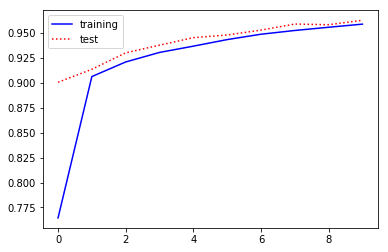

In [38]:
plt.plot(hist1.history['acc'], 'b-', label="training")
plt.plot(hist1.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [39]:
np.max(hist1.history['acc']),np.max(hist1.history['val_acc'])

(0.9588833200931549, 0.9627999973297119)

In [40]:
model1.save("mnist_cnn11.hdf5")

In [41]:
np.random.seed(0)

model2 = Sequential()

model2.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())
model2.add(Conv2D(4, (5, 5), activation='relu', kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))

In [42]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 4)           404       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 4)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
_________________________________________________________________


In [43]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [45]:
%%time
hist2 = model2.fit(train_X, train_y, epochs=20, batch_size=600, validation_data=(test_X, test_y), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 12s - loss: 1.0248 - acc: 0.6604 - val_loss: 0.4348 - val_acc: 0.8598
Epoch 2/20
 - 11s - loss: 0.3465 - acc: 0.8943 - val_loss: 0.2701 - val_acc: 0.9193
Epoch 3/20
 - 11s - loss: 0.2665 - acc: 0.9192 - val_loss: 0.2223 - val_acc: 0.9324
Epoch 4/20
 - 11s - loss: 0.2281 - acc: 0.9313 - val_loss: 0.1973 - val_acc: 0.9400
Epoch 5/20
 - 10s - loss: 0.2017 - acc: 0.9394 - val_loss: 0.1786 - val_acc: 0.9469
Epoch 6/20
 - 10s - loss: 0.1841 - acc: 0.9449 - val_loss: 0.1574 - val_acc: 0.9535
Epoch 7/20
 - 10s - loss: 0.1694 - acc: 0.9491 - val_loss: 0.1481 - val_acc: 0.9565
Epoch 8/20
 - 10s - loss: 0.1583 - acc: 0.9528 - val_loss: 0.1384 - val_acc: 0.9590
Epoch 9/20
 - 11s - loss: 0.1480 - acc: 0.9560 - val_loss: 0.1287 - val_acc: 0.9625
Epoch 10/20
 - 10s - loss: 0.1399 - acc: 0.9582 - val_loss: 0.1253 - val_acc: 0.9627
Epoch 11/20
 - 11s - loss: 0.1338 - acc: 0.9601 - val_loss: 0.1158 - val_acc: 0.9653
Epoch 12/20
 - 11s - los

In [ ]:
plt.plot(hist2.history['acc'], 'b-', label="training")
plt.plot(hist2.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [ ]:
model2.save("mnist_cnn21.hdf5")